In [1]:
# Code for Medium posting on internet use - August 18, 2016
# American Community Survey (2013-2014) data from IPUMS
# Laura Nolan

In [2]:
import csv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
mypath = # redacted
path_acs_internet = os.path.join(mypath, 'internet.csv') # just Oakland

In [4]:
# Household-level internet use data
internet_all = pd.read_csv(path_acs_internet)
print internet_all.head() 
internet_all.age = internet_all.age.astype(int)

print len(internet_all.axes[0])

   year  datanum  serial  hhwt  repwt  city                                gq  \
0  2013        1   66410    97      1  4930  Households under 1970 definition   
1  2013        1   66410    97      1  4930  Households under 1970 definition   
2  2013        1   66474    62      1  4930  Households under 1970 definition   
3  2013        1   66558    55      1  4930  Households under 1970 definition   
4  2013        1   66558    55      1  4930  Households under 1970 definition   

  cilaptop cihand ciothcomp    ...     repwt78 repwt79 repwt80 pernum perwt  \
0       No     No        No    ...         104      85      92      1    97   
1       No     No        No    ...         104      85      92      2    80   
2      Yes     No        No    ...         105     121      68      1    62   
3      Yes     No        No    ...          57      62     103      1    56   
4      Yes     No        No    ...          57      62     103      2    54   

  age educ educd  ftotinc  poverty  
0

In [5]:
# list of variables
print list(internet_all.columns.values)
print len(internet_all.axes[0])

['year', 'datanum', 'serial', 'hhwt', 'repwt', 'city', 'gq', 'cilaptop', 'cihand', 'ciothcomp', 'cinethh', 'cimodem', 'cisat', 'cidsl', 'cifiber', 'cibrdbnd', 'cidial', 'ciothsvc', 'repwt1', 'repwt2', 'repwt3', 'repwt4', 'repwt5', 'repwt6', 'repwt7', 'repwt8', 'repwt9', 'repwt10', 'repwt11', 'repwt12', 'repwt13', 'repwt14', 'repwt15', 'repwt16', 'repwt17', 'repwt18', 'repwt19', 'repwt20', 'repwt21', 'repwt22', 'repwt23', 'repwt24', 'repwt25', 'repwt26', 'repwt27', 'repwt28', 'repwt29', 'repwt30', 'repwt31', 'repwt32', 'repwt33', 'repwt34', 'repwt35', 'repwt36', 'repwt37', 'repwt38', 'repwt39', 'repwt40', 'repwt41', 'repwt42', 'repwt43', 'repwt44', 'repwt45', 'repwt46', 'repwt47', 'repwt48', 'repwt49', 'repwt50', 'repwt51', 'repwt52', 'repwt53', 'repwt54', 'repwt55', 'repwt56', 'repwt57', 'repwt58', 'repwt59', 'repwt60', 'repwt61', 'repwt62', 'repwt63', 'repwt64', 'repwt65', 'repwt66', 'repwt67', 'repwt68', 'repwt69', 'repwt70', 'repwt71', 'repwt72', 'repwt73', 'repwt74', 'repwt75', 're

In [6]:
# keeping just one person per household
internet = internet_all.groupby('serial').nth(0) 
print len(internet.axes[0]) # sample size

3984


In [7]:
internet.hhwt = internet.hhwt.astype(int)

In [8]:
print internet.groupby(by=['cilaptop'])['hhwt'].sum().div(internet.hhwt.sum()) * 100

cilaptop
N/A (GQ)     4.038047
No          19.983585
Yes         75.978368
Name: hhwt, dtype: float64


In [9]:
# turning cilaptop variable into yes(1)/no(0) indicator
internet = pd.concat([internet, pd.get_dummies(internet["cilaptop"])[[2]]], axis = 1)
# renaming
internet = internet.rename(columns = {'Yes':'cilaptop_ind'})

In [10]:
np.average(internet.cilaptop_ind, weights = internet.hhwt) # 76% of oakland households have computer/laptop at home

0.75978367604168195

In [11]:
# Weighted table - access to internet
#label 0 `"N/A (GQ)"'
#label 1 `"Yes, with a subscription to an Internet Service"', add
#label 2 `"Yes, without a subscription to an Internet Service"', add
#label 3 `"No Internet access at this house, apartment, or mobile home"', add

# weighted table
print internet.groupby(by=['cinethh'])['hhwt'].sum().div(internet.hhwt.sum()) * 100
# 22% of Oakland households either don't have internet or have it without an internet service

cinethh
0           4.038047
1          74.267122
2           3.576380
3          18.118451
Name: hhwt, dtype: float64


In [12]:
# type of internet access?

#label var cimodem   `"Cable internet service"'
#label var cisat     `"Satellite internet service"'
#label var cidsl     `"DSL service"'
#label var cifiber   `"Fiber-optic Internet service"'
#label var cibrdbnd  `"Mobile broadband plan"'
#label var cidial    `"Dial-up service"'
#label var ciothsvc  `"Other internet service"'

def internet_source (row):
    if row['cimodem'] == 'Yes':
        return 'Cable internet service'
    if row['cisat'] == 'Yes':
        return 'Satellite internet service'
    if row['cidsl'] == 'Yes':
        return 'DSL service'
    if row['cifiber'] == 'Yes':
        return 'Fiber-optic Internet service'
    if row['cibrdbnd']:
        return 'Mobile broadband plan'
    if row['cidial'] == 'Yes':
        return 'Dial-up service'
    if row['ciothsvc'] == 'Yes':
        return 'Other internet service'
    
internet['internet_source'] = internet.apply (lambda row: internet_source (row), axis=1)

internet.internet_source.head()
print internet.head()

        age  cibrdbnd    cidial     cidsl   cifiber cihand cilaptop   cimodem  \
serial                                                                          
66407    94  N/A (GQ)  N/A (GQ)  N/A (GQ)  N/A (GQ)     No       No  N/A (GQ)   
66410    64  N/A (GQ)  N/A (GQ)  N/A (GQ)  N/A (GQ)     No       No  N/A (GQ)   
66474    82        No        No       Yes        No     No      Yes        No   
66558    62        No        No       Yes        No     No      Yes        No   
66610    54       Yes        No       Yes        No    Yes      Yes        No   

        cinethh ciothcomp    ...    repwt76 repwt77  repwt78  repwt79  repwt8  \
serial                       ...                                                
66407         3        No    ...         89      17       50       68      54   
66410         3        No    ...         92      28      104       85     110   
66474         1        No    ...         63      18      105      121     120   
66558         1        No  

In [24]:
# keeping only those with internet service at home; distribution of service providers
print internet[internet['cinethh'] == 1].groupby(by=['internet_source'])['hhwt'].sum().div(internet[internet['cinethh'] == 1].hhwt.sum()) * 100

internet_source
Cable internet service          60.152901
DSL service                     24.601170
Fiber-optic Internet service     3.776355
Mobile broadband plan            8.512192
Satellite internet service       2.957382
Name: hhwt, dtype: float64


In [25]:
# weighted counts for each type of internet service for pie graph
n = internet[internet['cinethh'] == 1].groupby(by=['internet_source'])['hhwt'].sum()
print n

internet_source
Cable internet service          152407
DSL service                      62331
Fiber-optic Internet service      9568
Mobile broadband plan            21567
Satellite internet service        7493
Name: hhwt, dtype: int64


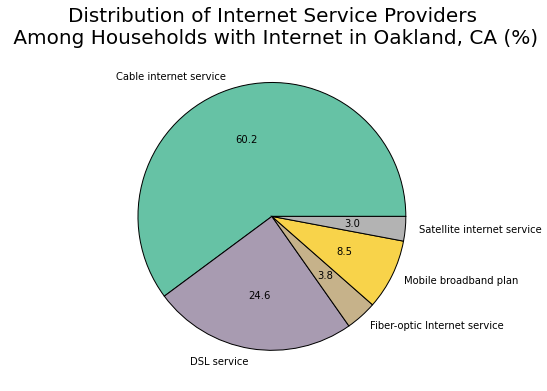

In [26]:
fig, ax = plt.subplots(figsize=(4,3))
ax = pd.Series(n).plot(kind='pie', figsize=(6, 6), autopct='%.1f', colormap='Set2')
ax.set_ylabel('')
ax.set_title('Distribution of Internet Service Providers \n Among Households with Internet in Oakland, CA (%)', fontsize=20)
plt.savefig('/Users/laura/Dropbox/posting/internet_use/int-dist.png', bbox_inches='tight', dpi = 150)

In [27]:
# internet access among the poor
internet['poverty_ind'] = (internet.poverty < 100).astype(int)
print np.average(internet.poverty_ind, weights = internet.hhwt) # Oakland proportion poor (2013-2014 ACS)

0.207292872741


In [28]:
# OVER A THIRD of the poor households don't have internet
print "Internet access, non-poor"
print internet[internet['poverty_ind'] == 1].groupby(by=['cinethh'])['hhwt'].sum().div(internet[internet['poverty_ind'] == 1].hhwt.sum()) * 100
print "internet access, poor"
print internet[internet['poverty_ind'] == 0].groupby(by=['cinethh'])['hhwt'].sum().div(internet[internet['poverty_ind'] == 0].hhwt.sum()) * 100

Internet access, non-poor
cinethh
0          17.429545
1          41.507940
2           6.136965
3          34.925550
Name: hhwt, dtype: float64
internet access, poor
cinethh
0           0.536171
1          82.833646
2           2.906788
3          13.723395
Name: hhwt, dtype: float64


In [29]:
# internet access among households with children...
# keep just children, then keep one child per household
internet_child = internet_all[internet_all['age'] > 18]
internet_child = internet_child.groupby('serial').nth(0) 
print len(internet_child.axes[0])

internet_child.groupby(by=['cinethh'])['hhwt'].sum().div(internet_child.hhwt.sum()) * 100

3945


cinethh
0           3.608580
1          74.599497
2           3.592386
3          18.199538
Name: hhwt, dtype: float64